In [1]:
# Required imports
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud
import nltk
nltk.download('punkt') # Tokenizer functionality
nltk.download('stopwords')
from nltk.corpus import stopwords # Stop words
from wordcloud import WordCloud # Wordcloud
import matplotlib.pyplot as plt # Plot
from nltk.probability import FreqDist # Frequency distribution

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached regex-2022.3.15-cp310-cp310-win_amd64.whl (274 kB)
  Using cached click-8.1.2-py3-none-any.whl (96 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\nltk.exe' -> 'C:\\Python310\\Scripts\\nltk.exe.deleteme'



     ------------------------------------ 220.7/220.7 KB 794.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Running setup.py install for wordcloud did not run successfully.
  │ exit code: 1
  ╰─> [63 lines of output]
      running install
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd

In [2]:
# Open the file
f = open("negative_rev.txt", "r")
# Store the data (in "standartized")
data = f.read().lower()

# Close the file after we done with it
f.close

<function TextIOWrapper.close()>

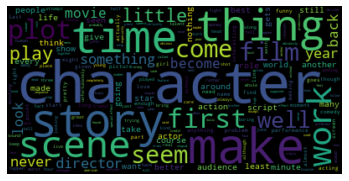

In [3]:
# Tokenise the data
tokens = nltk.tokenize.word_tokenize(data)

# Setup stopwords
stopwords = nltk.corpus.stopwords.words('english')
specific_stops = ('`','\'s','(', ')', '`', '``','n\'t', '.', '?', '!', ':', '\'', ',' , '--', 'film', 'movie', 'like', 'even', 'much', 'really', 'good', 'would', 'could','also', 'know')
for word in specific_stops:
    stopwords.append(word)

# Filter data
tokens = [word for word in tokens if not word in stopwords and len(word)>3]

# Generate a word cloud
wordcloud = WordCloud().generate(''.join([str(token) + " " for token in tokens]))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')

# Plot settings
plt.axis("off")
plt.show()

FreqDist({'story': 118, 'character': 105, 'characters': 98, 'time': 98, 'make': 86, 'first': 74, 'films': 73, 'plot': 69, 'little': 67, 'something': 67, ...})


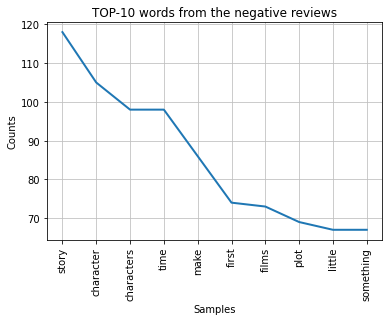

<AxesSubplot:title={'center':'TOP-10 words from the negative reviews'}, xlabel='Samples', ylabel='Counts'>

In [4]:
# Create frequency distribution
freq = nltk.FreqDist(tokens)

freq.pprint(10)

# Plot TOP-10 words from the file
freq.plot(10,cumulative=False, title="TOP-10 words from the negative reviews")